In [1]:
#Nama : Moh Aji Prasetyo
#NIM : 17.01.53.0047
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/orderdetaill/order_details.csv


In [2]:
import pandas as pd
import numpy as np

#Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import squarify
import matplotlib

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from mlxtend.preprocessing import TransactionEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv('../input/orderdetaill/order_details.csv',header=None)

In [4]:
#shape
data.shape

(2156, 5)

In [5]:
#head of data

data.head(10)


#tail of data

data.tail()

,0,1,2,3,4
0,orderID,productID,unitPrice,quantity,discount
1,10248,11,14.00,12,0
2,10248,42,9.80,10,0
3,10248,72,34.80,5,0
4,10249,14,18.60,9,0
5,10249,51,42.40,40,0
6,10250,41,7.70,10,0
7,10250,51,42.40,35,0.15
8,10250,65,16.80,15,0.15
9,10251,22,16.80,6,0.05


,0,1,2,3,4
2151,11077,64,33.25,2,0.03
2152,11077,66,17.00,1,0
2153,11077,73,15.00,2,0.01
2154,11077,75,7.75,4,0
2155,11077,77,13.00,2,0


In [6]:
#for using aprori need to convert data in list format..
transactions = []
for i in range(0,len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0,5) if str(data.values[i,j])!='0'])

In [7]:
transactions[0]

['orderID', 'productID', 'unitPrice', 'quantity', 'discount']

In [8]:
### Using TransactionEncoder

t=TransactionEncoder()
data=t.fit_transform(transactions)
data=pd.DataFrame(data,columns=t.columns_,dtype=int)

data.shape

(2156, 1046)

In [9]:
data.head()

,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.2,0.25,...,9.80,90,91,97.00,99.00,discount,orderID,productID,quantity,unitPrice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#now lets check shape
data.shape


(2156, 1046)

In [11]:
data.head()

,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.2,0.25,...,9.80,90,91,97.00,99.00,discount,orderID,productID,quantity,unitPrice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1440x720 with 0 Axes>

[Text(0, 0, '0.05'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.15'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.25'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '18.00'),
 Text(0, 0, '2'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '30'),
 Text(0, 0, '35'),
 Text(0, 0, '40'),
 Text(0, 0, '50'),
 Text(0, 0, '6'),
 Text(0, 0, '60')]

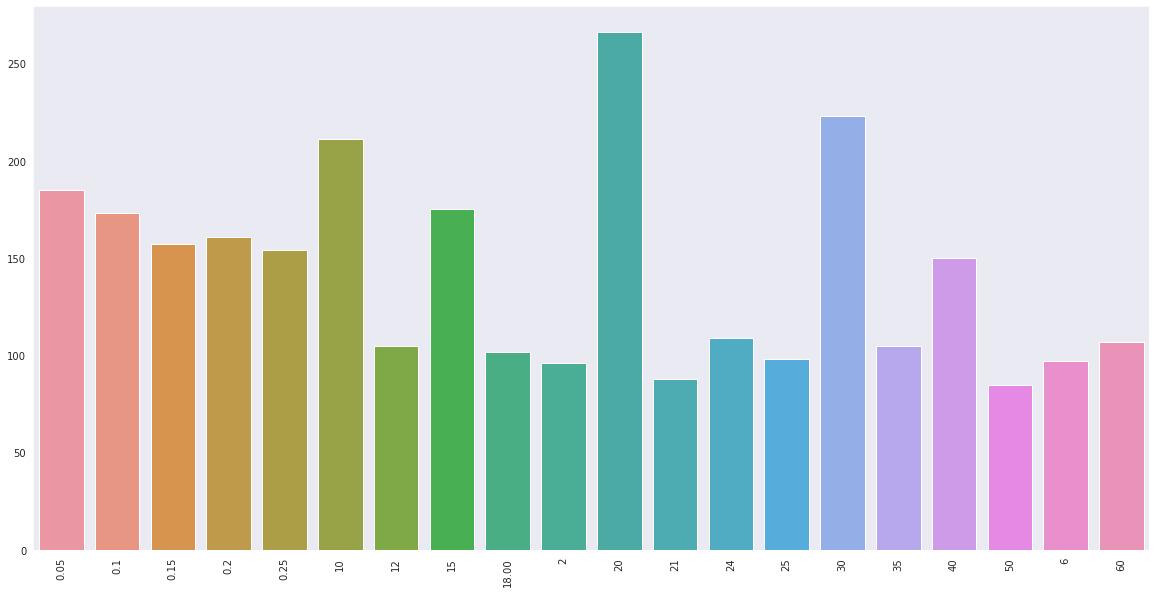

In [12]:
##Lets consider the top 20 items purchased freequently
r=data.sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Tree map of top 20 items')

(0.0, 100.0, 0.0, 100.0)

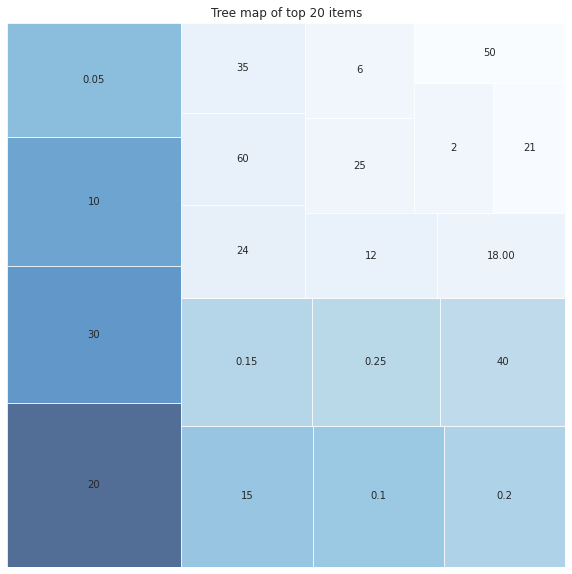

In [13]:
# create a color palette, mapped to these values
my_values=r.values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]


#treemap of top 20 frequent items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Tree map of top 20 items")
plt.axis('off')

In [14]:
freq_items=apriori(data,min_support=0.05,use_colnames=True)

In [15]:
freq_items

,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
5,0.097866,(10)
6,0.081169,(15)
7,0.123377,(20)
8,0.050557,(24)
9,0.103432,(30)


In [16]:
res=association_rules(freq_items,metric="lift",min_threshold=1.3)

In [17]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [18]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.085807,(0.05),1
1,0.080241,(0.1),1
2,0.072820,(0.15),1
3,0.074675,(0.2),1
4,0.071429,(0.25),1
5,0.097866,(10),1
6,0.081169,(15),1
7,0.123377,(20),1
8,0.050557,(24),1
9,0.103432,(30),1


In [19]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length


In [20]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.085807,(0.05),1
1,0.080241,(0.1),1
2,0.072820,(0.15),1
3,0.074675,(0.2),1
4,0.071429,(0.25),1
5,0.097866,(10),1
6,0.081169,(15),1
7,0.123377,(20),1
8,0.050557,(24),1
9,0.103432,(30),1


In [21]:
from mlxtend.frequent_patterns import fpgrowth

In [22]:
res=fpgrowth(data,min_support=0.05,use_colnames=True)

In [23]:
res

,support,itemsets
0,0.097866,(10)
1,0.069573,(40)
2,0.072820,(0.15)
3,0.081169,(15)
4,0.085807,(0.05)
5,0.123377,(20)
6,0.050557,(24)
7,0.103432,(30)
8,0.074675,(0.2)
9,0.071429,(0.25)


In [24]:
res=association_rules(res,metric="lift",min_threshold=1)

In [25]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [26]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(data,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
...,...,...
134,0.015770,"(62, 49.30)"
135,0.013915,"(53.00, 51)"
136,0.011132,"(52, 7.00)"
137,0.016234,"(59, 55.00)"


,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
5,0.025510,(1)
6,0.097866,(10)
7,0.032931,(10.00)
8,0.048701,(12)
9,0.025510,(12.50)


,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
5,0.097866,(10)
6,0.032931,(10.00)
7,0.048701,(12)
8,0.081169,(15)
9,0.035714,(16)


,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
5,0.097866,(10)
6,0.048701,(12)
7,0.081169,(15)
8,0.047310,(18.00)
9,0.044527,(2)


,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
5,0.097866,(10)
6,0.081169,(15)
7,0.123377,(20)
8,0.050557,(24)
9,0.103432,(30)


In [27]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(data,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.048701,(12)
1,0.025974,(14.00)
2,0.018553,(11)
3,0.097866,(10)
4,0.022263,(42)
...,...,...
134,0.011596,"(39.00, 17)"
135,0.012059,"(21.00, 11)"
136,0.013915,"(53.00, 51)"
137,0.011596,"(71, 21.50)"


,support,itemsets
0,0.048701,(12)
1,0.025974,(14.00)
2,0.097866,(10)
3,0.022263,(42)
4,0.035714,(5)
5,0.026902,(14)
6,0.069573,(40)
7,0.021800,(41)
8,0.072820,(0.15)
9,0.048701,(35)


,support,itemsets
0,0.048701,(12)
1,0.097866,(10)
2,0.035714,(5)
3,0.069573,(40)
4,0.072820,(0.15)
5,0.048701,(35)
6,0.081169,(15)
7,0.085807,(0.05)
8,0.044991,(6)
9,0.123377,(20)


,support,itemsets
0,0.048701,(12)
1,0.097866,(10)
2,0.069573,(40)
3,0.072820,(0.15)
4,0.048701,(35)
5,0.081169,(15)
6,0.085807,(0.05)
7,0.044991,(6)
8,0.123377,(20)
9,0.045455,(25)


,support,itemsets
0,0.097866,(10)
1,0.069573,(40)
2,0.072820,(0.15)
3,0.081169,(15)
4,0.085807,(0.05)
5,0.123377,(20)
6,0.050557,(24)
7,0.103432,(30)
8,0.074675,(0.2)
9,0.071429,(0.25)


Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

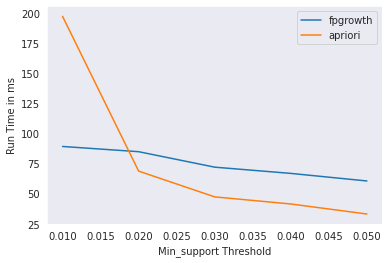

In [28]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")